DBSCAN is a density-based clustering algorithm that groups data points that are closely packed together and marks outliers as noise based on their density in the feature space. It identifies clusters as dense regions in the data space separated by areas of lower density. Unlike K-Means or hierarchical clustering which assumes clusters are compact and spherical, DBSCAN perform well in handling real-world data irregularities such as:

Arbitrary-Shaped Clusters: Clusters can take any shape not just circular or convex.
Noise and Outliers: It effectively identifies and handles noise points without assigning them to any cluster.

In [21]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

import warnings 
warnings.filterwarnings('ignore')

In [22]:
# Loading Datasets

X, y = make_moons(n_samples=20, noise=0.4, random_state=42)
print(f"The independent data : \n {X}")
print(f"The dependent data : \n {y}")
print(X.shape)
print(y.shape)

The independent data : 
 [[ 1.58495125  0.61548599]
 [ 0.79040212  0.09858888]
 [ 1.07323059 -0.5503546 ]
 [ 0.34916074  0.93681253]
 [-0.94947469  0.48424067]
 [-0.00684373  1.3177925 ]
 [-0.05705228  0.14604443]
 [ 0.53805031  1.13188714]
 [ 1.88360522  0.1447025 ]
 [ 1.20036939 -0.67737821]
 [ 0.87953714  0.26631483]
 [ 0.61877607  0.79301346]
 [-1.47726329 -0.16362076]
 [ 1.82130341  1.10969665]
 [ 0.3028481   0.42744098]
 [-0.63737814 -0.56034617]
 [-0.69696696  0.77246712]
 [ 0.29834382 -0.2346333 ]
 [ 1.05213752 -0.47460749]
 [-0.3107227   1.12970164]]
The dependent data : 
 [0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0]
(20, 2)
(20,)


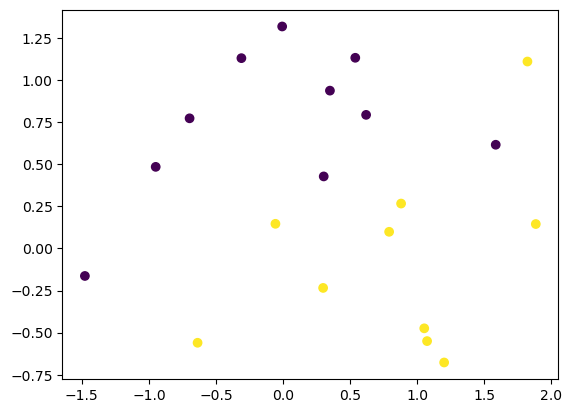

In [23]:
# Plotting the actual graph

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [24]:
# Standardizing the data by Scaling

sc = StandardScaler()
X_scaled = sc.fit_transform(X)
print(f"The scaled independent data: \n{X_scaled}")

The scaled independent data: 
[[ 1.30568342  0.45165356]
 [ 0.4205805  -0.38265227]
 [ 0.73564259 -1.43008961]
 [-0.07094862  0.97029567]
 [-1.51758795  0.23981501]
 [-0.46752649  1.58522232]
 [-0.52345724 -0.3060559 ]
 [ 0.13946847  1.28515889]
 [ 1.63837463 -0.30822187]
 [ 0.87727124 -1.63511404]
 [ 0.51987413 -0.11193159]
 [ 0.22939444  0.73819455]
 [-2.10552797 -0.80587583]
 [ 1.56897235  1.24934198]
 [-0.12253946  0.14813658]
 [-1.16992213 -1.44621666]
 [-1.23630222  0.7050314 ]
 [-0.12755709 -0.92049472]
 [ 0.71214556 -1.3078288 ]
 [-0.80603817  1.28163135]]


In [25]:
# DBSCAN

db= DBSCAN(eps=0.3, min_samples=5)
db.fit(X_scaled)
print(db.labels_)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


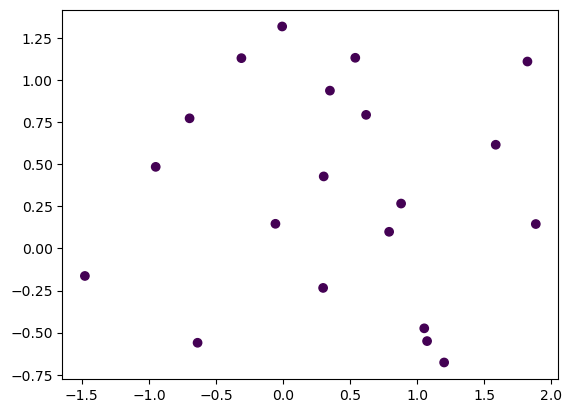

In [26]:
# Plotting the predicted graph after DBSCAN 

plt.scatter(X[:,0], X[:,1], c = db.labels_)
plt.show()

Best eps: 0.4
Cluster labels: [-1 -1  0  1 -1 -1 -1  1 -1  0 -1  1 -1 -1 -1 -1 -1 -1  0 -1]


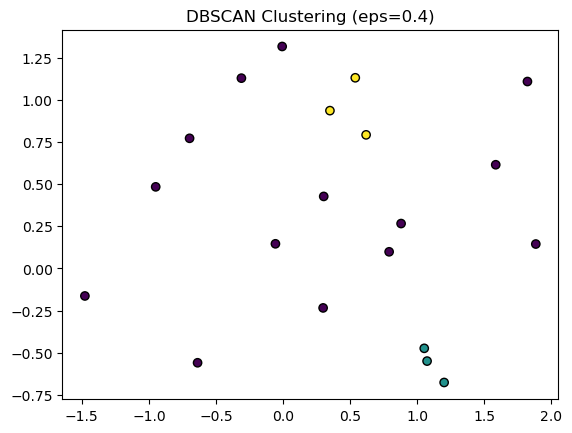

In [28]:
# Parameter tuning and noise/outlier handling
# Try a range of eps values to find the best clustering
best_eps = None
best_score = -1
best_labels = None

for eps in [0.2, 0.3, 0.4, 0.5, 0.6]:
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X_scaled)
    # Silhouette score is only valid if there are at least 2 clusters (excluding noise)
    if len(set(labels)) > 1 and len(set(labels)) != 2 or -1 not in set(labels):
        score = silhouette_score(X_scaled, labels)
        if score > best_score:
            best_score = score
            best_eps = eps
            best_labels = labels

# Fit DBSCAN with the best eps
dbscan = DBSCAN(eps=best_eps, min_samples=3)
labels = dbscan.fit_predict(X_scaled)

print(f"Best eps: {best_eps}")
print(f"Cluster labels: {labels}")

# Plot the results, marking noise points in black
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k')
plt.title(f"DBSCAN Clustering (eps={best_eps})")
plt.show()